In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split

# PART-1

## The following data represents the price in dollars for branded shirts in a website NuCloth

###                                    23 30 20 27 44 26 35 20 29 29
###                                    25 15 18 27 19 22 12 26 34 15
###                                    27 35 26 43 35 14 24 12 23 31
###                                    40 35 38 57 22 42 24 21 27 33


In [2]:
data = [23, 30, 20, 27, 44, 26, 35, 20, 29, 29,
        25, 15, 18, 27, 19, 22, 12, 26, 34, 15,
        27, 35, 26, 43, 35, 14, 24, 12, 23, 31,
        40, 35, 38, 57, 22, 42, 24, 21, 27, 33]

df = pd.DataFrame(data, columns=["Price"])
df.head()

,Price
0,23
1,30
2,20
3,27
4,44


In [3]:
df.describe()

,Price
count,40.000000
mean,27.625000
std,9.622856
min,12.000000
25%,21.750000
50%,26.500000
75%,34.250000
max,57.000000


### Q1. Compute the mean, median and the mode of the data

In [4]:
print('Mean =',df['Price'].mean())
print('Median = ',df['Price'].median())
print('Mode = ',df['Price'].mode()[0])

Mean = 27.625
Median =  26.5
Mode =  27


### Q2. Compute the range , variance and standard deviation of the data

In [5]:
print('Range =',df['Price'].max()-df['Price'].min())
print('Variance = ',df['Price'].var())
print('Standard deviation = ',df['Price'].std())

Range = 45
Variance =  92.59935897435898
Standard deviation =  9.622856071580774


### Q3.Find the mean deviation for the data . The mean deviation is defined as below.

In [6]:
mean=df['Price'].mean()

df['Deviation'] = df['Price'].apply(lambda x:abs(x-mean))
sum_deviation = df['Deviation'].sum()
print('Mean Deviation =',sum_deviation/len(df))

Mean Deviation = 7.4


### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [7]:
# formula = (3*(x_bar-median))/std

In [8]:
x_bar = df['Price'].mean()
median = df['Price'].median()
std = df['Price'].std()

print('Pearson coefficient of skewness =',(3*(x_bar-median))/std)
print('\n The price in dollars for branded shirts in a website NuCloth is Right Tail or Positive Skewed data','\n and value is 0.350 which is greater than zero')

Pearson coefficient of skewness = 0.3507274737245009

 The price in dollars for branded shirts in a website NuCloth is Right Tail or Positive Skewed data 
 and value is 0.350 which is greater than zero


### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem

In [9]:
df['zscore']=stats.zscore(df['Price'])

In [10]:
print('The no. of data values that fall within two standard deviations of the mean are',len(df[(df['zscore']>-2)&(df['zscore']<2)]))

The no. of data values that fall within two standard deviations of the mean are 39


In [11]:
# Chebyshev's Theorem states that for any given data set, regardless of the shape of the distribution:

# At least (1 - 1/k^2) of the data values fall within k standard deviations of the mean,
# where k is any positive constant greater than 1.

In [12]:
k=2
print(int((1-1/k**2)*100),' percent of the data values should fall within two standard deviations of the mean.')

75  percent of the data values should fall within two standard deviations of the mean.


by comparing the 39 datapoint and from chebyshev theorem we predict at least 75% of data points should lie within the bound of 2 standard deviation 

### Q6. Find the three quartiles and the interquartile range (IQR).

In [13]:
q1=df['Price'].quantile(0.25)
q2=df['Price'].quantile(0.5)
q3=df['Price'].quantile(0.75)
q1,q2,q3

(21.75, 26.5, 34.25)

In [14]:
IQR = q3-q1
print('InterQuartile Range is',IQR)

InterQuartile Range is 12.5


### Q7. Are there any outliers in the data set ?

In [15]:
ll = q1-1.5*IQR
ul = q3+1.5*IQR

outliers = df[(df['Price']<ll)|(df['Price']>ul)]

if len(outliers) > 0:
    print("Outliers present")
else:
    print("No outliers found.")

Outliers present


### Q8. Draw a boxplot of the dataset to confirm .

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

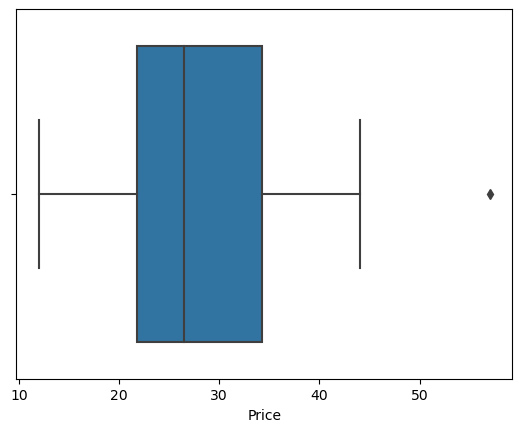

In [16]:
sns.boxplot(df['Price'])

Inference:
1.from the above plot we can see that the presence of outlier in the dataset

### Q9. Find the percentile rank of the datapoint 25

In [17]:
sorted_data = np.sort(data)

position = np.where(sorted_data == 25)[0][0] + 1

percentile_rank = (position / (len(sorted_data) - 1)) * 100

print("Percentile rank of 25:", percentile_rank)

Percentile rank of 25: 43.58974358974359


### Q10. What is the probability that a shirt cost is above 25 dollars?

In [18]:
mean = df['Price'].mean()
std = df['Price'].std()
x=25
z_25 = (25-mean)/std
z_25

-0.27278803511905625

In [19]:
# we assume data is normal


stats.norm.sf(z_25)

0.6074919212644473

### Q11. Create a frequency distribution for the data and visualize it appropriately

<AxesSubplot:xlabel='Price', ylabel='Count'>

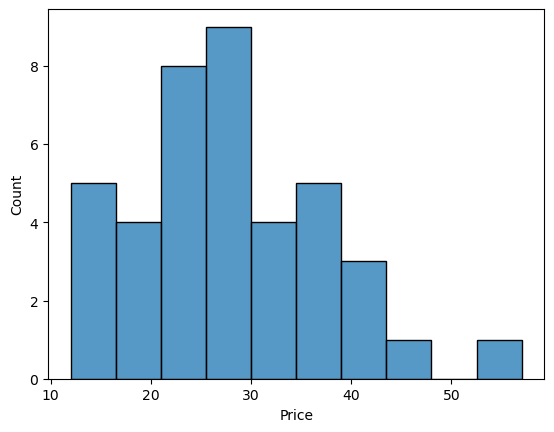

In [20]:
sns.histplot(df['Price'],bins=10)

Inference:

1. most of the data lies in range of 20 to 30
2 .we can see the data is right skewed

### Q12. Create a probability distribution of the data and visualize it appropriately.

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zscore', ylabel='Density'>

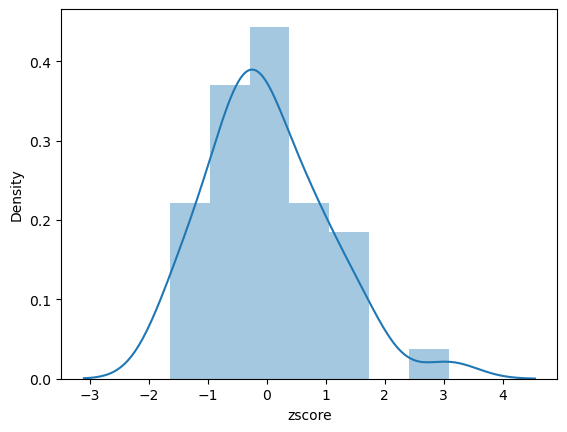

In [21]:
sns.distplot(df['zscore'])

### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that.Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution  of the mean shirt prices. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

In [22]:
df.shape

(40, 3)

<AxesSubplot:ylabel='Frequency'>

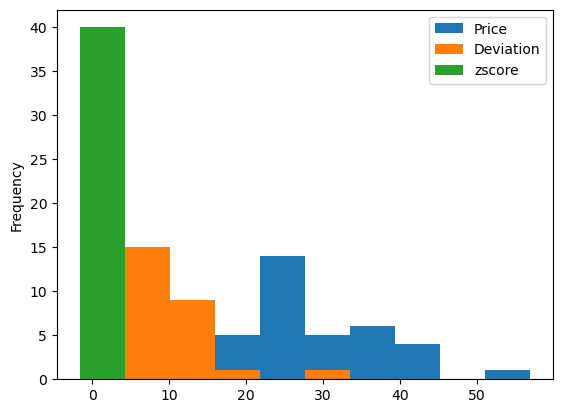

In [23]:
df.plot(kind='hist')

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

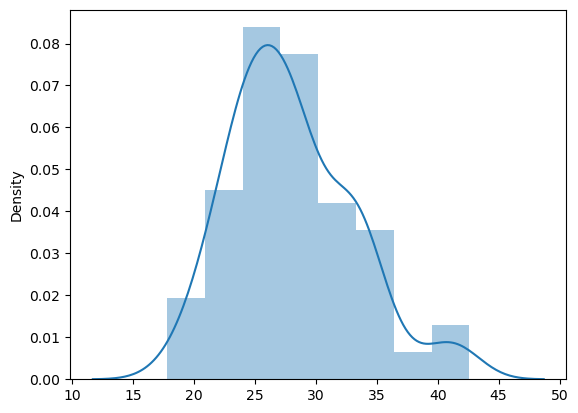

In [24]:
sample_size=5
no_of_sample = 100
sample_mean=[]
for i in range(no_of_sample):
    sample = np.random.choice(data,size=sample_size)
    sample_mean.append(np.mean(sample))
sns.distplot(sample_mean)

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

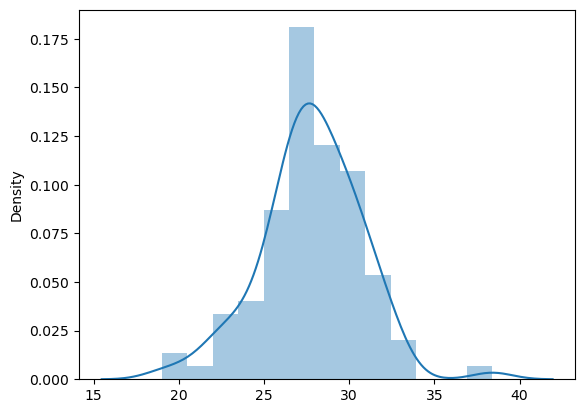

In [25]:
sample_size=10
no_of_sample = 100
sample_mean=[]
for i in range(no_of_sample):
    sample = np.random.choice(data,size=sample_size)
    sample_mean.append(np.mean(sample))
sns.distplot(sample_mean)

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

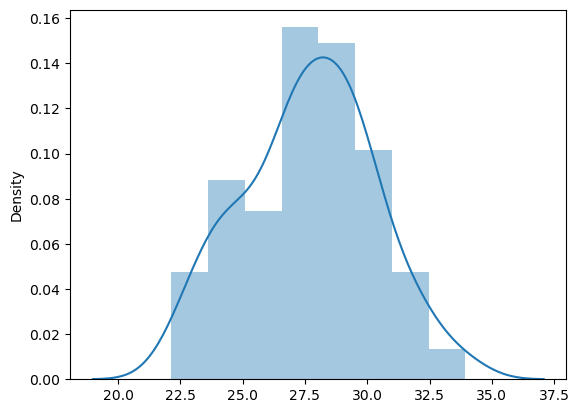

In [26]:
sample_size=15
no_of_sample = 100
sample_mean=[]
for i in range(no_of_sample):
    sample = np.random.choice(data,size=sample_size)
    sample_mean.append(np.mean(sample))
sns.distplot(sample_mean)

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

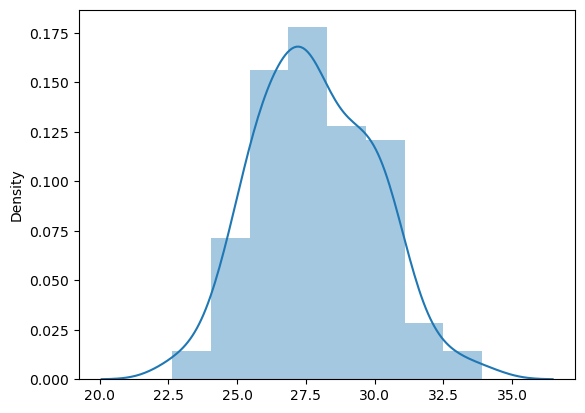

In [27]:
sample_size=20
no_of_sample = 100
sample_mean=[]
for i in range(no_of_sample):
    sample = np.random.choice(data,size=sample_size)
    sample_mean.append(np.mean(sample))
sns.distplot(sample_mean)

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

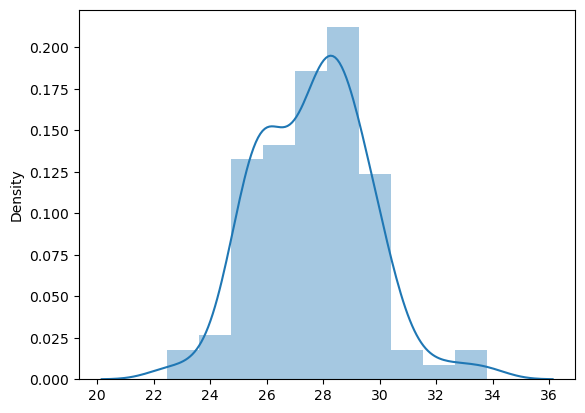

In [28]:
sample_size=25
no_of_sample = 100
sample_mean=[]
for i in range(no_of_sample):
    sample = np.random.choice(data,size=sample_size)
    sample_mean.append(np.mean(sample))
sns.distplot(sample_mean)

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

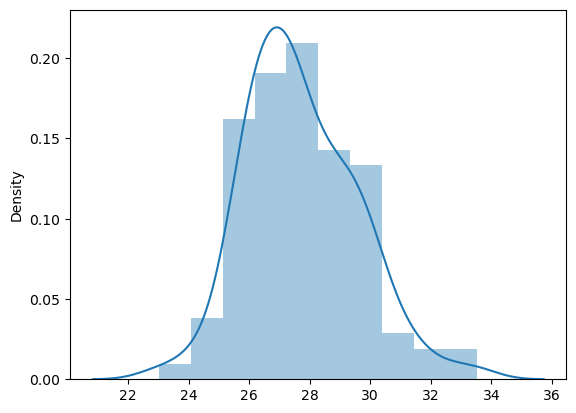

In [29]:
sample_size=30
no_of_sample = 100
sample_mean=[]
for i in range(no_of_sample):
    sample = np.random.choice(data,size=sample_size)
    sample_mean.append(np.mean(sample))
sns.distplot(sample_mean)

Observation:

1. when the sample size is 5,10,15,20,25 we can observe the skewness in random samples
2. when the sample size is greater than or equal to 30 we can observe the sample mean follows normal distribution
3. so according  centarl limit theorem irrespective of population distribution the sample distribution will be normal
   when ever the sample size(n) greater than or equal to 30
4. from above we observe that CLT hold true for n>=30

### Q14. Treat this dataset as a binomial distribution where p is the probability that a shirt costs above 25 dollars. What is the probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars?


In [30]:
r=7
n=10
p=stats.norm.sf(z_25)

stats.binom.sf(r,n,p)

0.17967298154217862

### Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 dollars . Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars.[ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [31]:
p=0.6
r=7
n=10
stats.binom.cdf(r,n,p)

0.8327102464

### Q16. Compute a 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [32]:
# we assume data is normal
# population std is unknown so we assume sample std as pop std
# n is greater than or equal to 30
# so we go for ztest

In [33]:
xbar = df['Price'].mean()
sigma = df['Price'].std()
n=len(df)
z_alpha_by2 = stats.norm.isf(0.05/2)
print(xbar,sigma,n,z_alpha_by2)

27.625 9.622856071580774 40 1.9599639845400545


In [34]:
ul = xbar+(1.96)*(sigma/np.sqrt(n))
ll = xbar-(1.96)*(sigma/np.sqrt(n))
print('confidence interval is (',ll,',',ul,')')

confidence interval is ( 24.642846007346797 , 30.607153992653203 )


### Q17. A data scientist wants to estimate with 95% confidence the true proportion of shirts having price greater than 25 dollars in the NuCloth website. A recent study showed that 60% of all shirts have a price greater than 25 dollars. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary

In [35]:
n=((1.96*sigma)/0.2)**2
print('the minimum sample size necessary',round(n))

the minimum sample size necessary 8893


### Q18. The same data scientist wants to estimate the true proportion of shirts having price greater than 25 dollars. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary

In [36]:
# n=(z_alpha_by2*sigma/me)**2

In [37]:
n = ((stats.norm.isf(0.1/2)*sigma)/0.5)**2
print('the minimum sample size necessary',round(n))

the minimum sample size necessary 1002


### Q19. NuCloth claims that currently 80% of all shirts have prices greater than 25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 shirts only 23 are having prices above 25 dollars

In [38]:
# H0 : p0<=0.8
# H1 : p0>0.8
# we perform right tail test for proportion test

In [39]:
p0=0.8
p_s = 23/30
n=30

test_stat = (p_s-p0)/np.sqrt((p0*(1-p0))/n)
test_stat

-0.45643546458763834

In [40]:
pval = stats.norm.sf(test_stat)

if pval<0.05:
    print('we rejct H0')
else:
    print('we fail to reject H0')

we fail to reject H0


### Q20. A data scientist is researching the hypothesis that the average price of a shirt in NuCloth is higher than the supermarket. So he collects data from NuCloth and the supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34 dollars in the supermarket. The standard deviations are 7.6 and 5.8 respectively.Suppose the data scientist got these values after randomly selecting 100 shirts from each place.


#### a. What hypothesis would he use to compare the shirt prices of NuCloth vs Supermarket
#### b. What are critical values to be used?
#### c. What statistical test will be used to compare these prices?
#### d. Complete the test and obtain the P-value.
#### e. Summarize his conclusion based on the P-value

In [41]:
# H0 : mu_nucloth <= mu_supermarket

# H1 : mu_nucloth > mu_supermarket

# we perform 2 sample ztest as n>=30 and directionality is right tail test

In [42]:
x1=36
x2=34
s1=7.6
s2=5.8
n1=100
n2=100

In [43]:
# (x1-x2)(mu1-mu2)/np.sqrt(s1**2/n1+s2**2/n2)

In [44]:
test_stat = (x1-x2)/np.sqrt((s1**2/n1)+(s2**2/n2))
test_stat

2.09197696327652

In [45]:
# According to industry norms we consider the 95% confidence level 
cv = stats.norm.isf(0.05)
cv

1.6448536269514729

In [46]:
# calculation of pvalue

pval = stats.norm.sf(test_stat)
pval

0.018220288245112185

In [47]:
# conclusion
sig_level = 0.05
if pval<sig_level:
    print('we reject H0 and concluding that average price of a shirt in NuCloth is higher than the supermarket')
else:
    print('we fail to reject H0')
    

we reject H0 and concluding that average price of a shirt in NuCloth is higher than the supermarket


# PART-2

### 1. Read the datasets, Check the data types and Change the data types appropriately

In [49]:
df = pd.read_json('modcloth_final_data.json',lines=True)
df.head(2)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

### 2. Change the height column datatype to float after converting the values as shown Below. 5.7

In [51]:
def height(x):
    x = str(x)
    part = ((x.replace('ft','.')).replace('in','')).replace(' ','')
    return part

In [52]:
df['height'] = round(df['height'].apply(height).astype(float),1)

In [53]:
pd.set_option('display.max_rows',None)

In [54]:
pd.set_option('display.max_columns',None)

In [55]:
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5.7,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5.2,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  float64
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

### 3. Rename the names of the columns which have space in between the column.
#### Ex: shoe size as shoe_size etc.


In [57]:
df.rename(columns={'shoe size': 'shoe_size','cup size':'cup_size','bra size':'bra_size','shoe width':'shoe_width'}, inplace=True)

In [58]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text'],
      dtype='object')

### 4. Check the missing values and Identify the distribution of the variables to impute themissing values. Explain based on your analysis decide the features which can be dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values.
### Note: Kindly copy the datasets and work on the new data frame.
### 4.1 Check the count and percentage of missing values.

In [59]:
df.isnull().sum()

item_id               0
waist             79908
size                  0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

In [60]:
df.isnull().sum()/len(df)

item_id           0.000000
waist             0.965189
size              0.000000
quality           0.000821
cup_size          0.075553
hips              0.322817
bra_size          0.072690
category          0.000000
bust              0.856818
height            0.013371
user_name         0.000000
length            0.000423
fit               0.000000
user_id           0.000000
shoe_size         0.662822
shoe_width        0.775251
review_summary    0.081230
review_text       0.081230
dtype: float64

In [62]:
df['review_summary'].unique()

array([nan, 'Too much ruching', 'Suits my body type!', ...,
       "It's a beautiful jacket.", 'I love this blazer!! I wo',
       "I love this piece. I'm re"], dtype=object)

In [63]:
df['review_summary'].nunique()

61713

In [64]:
df_num = df.select_dtypes(include = np.number)
df_num.head()

,item_id,waist,size,quality,hips,bra_size,height,user_id,shoe_size
0,123373,29.0,7,5.0,38.0,34.0,5.6,991571,NaN
1,123373,31.0,13,3.0,30.0,36.0,5.2,587883,NaN
2,123373,30.0,7,2.0,NaN,32.0,5.7,395665,9.0
3,123373,NaN,21,5.0,NaN,NaN,NaN,875643,NaN
4,123373,NaN,18,5.0,NaN,36.0,5.2,944840,NaN


In [65]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat.head()

,cup_size,category,bust,user_name,length,fit,shoe_width,review_summary,review_text
0,d,new,36,Emily,just right,small,NaN,NaN,NaN
1,b,new,NaN,sydneybraden2001,just right,small,NaN,NaN,NaN
2,b,new,NaN,Ugggh,slightly long,small,NaN,NaN,NaN
3,dd/e,new,NaN,alexmeyer626,just right,fit,NaN,NaN,NaN
4,b,new,NaN,dberrones1,slightly long,small,NaN,NaN,NaN


### 4.2 check the Mean and Median

In [66]:
round(df_num.mean())

item_id      469325.0
waist            31.0
size             13.0
quality           4.0
hips             40.0
bra_size         36.0
height            5.0
user_id      498850.0
shoe_size         8.0
dtype: float64

In [67]:
round(df_num.median())

item_id      454030.0
waist            30.0
size             12.0
quality           4.0
hips             39.0
bra_size         36.0
height            6.0
user_id      497914.0
shoe_size         8.0
dtype: float64

### 4.3 Check the distribution of the variables using Histogram or Dist plot or KDE and boxplot etc.

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)


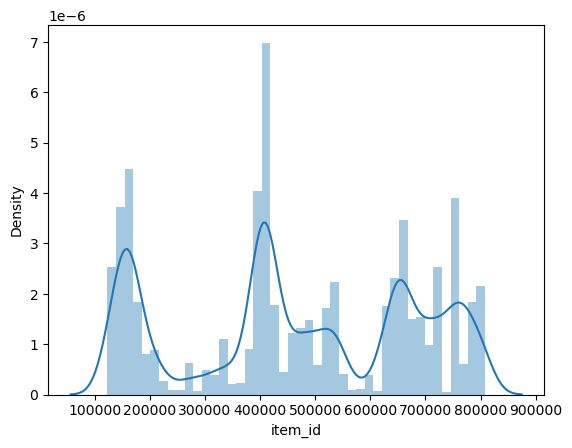

AxesSubplot(0.125,0.11;0.775x0.77)


/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


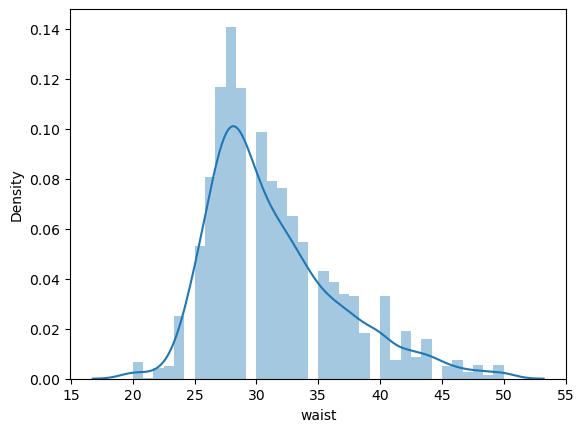

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)


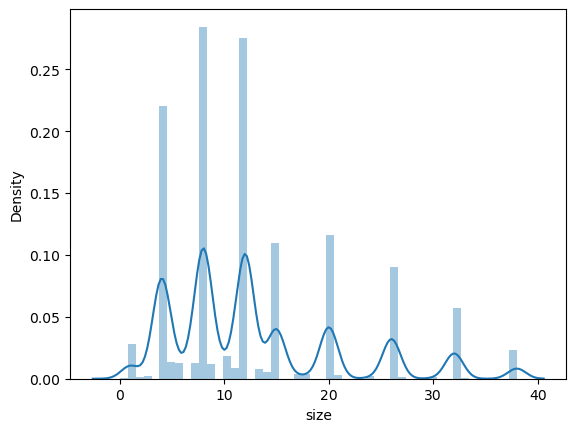

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)


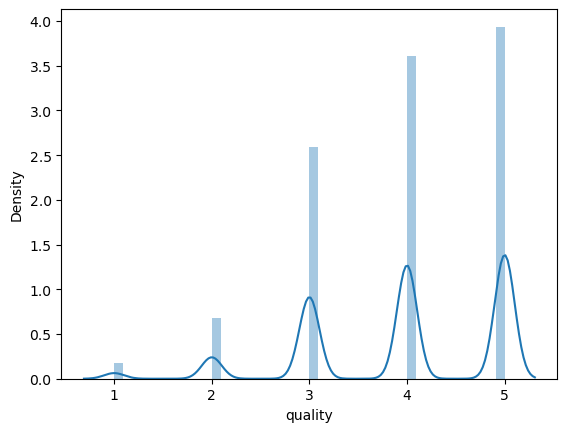

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)


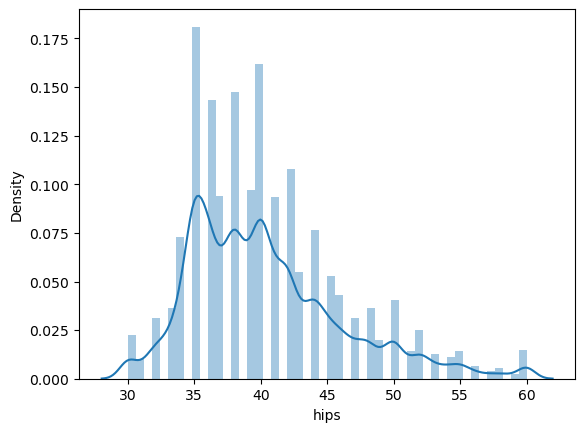

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)


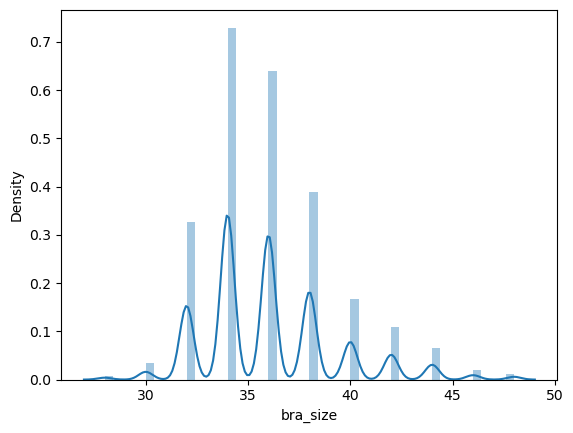

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)


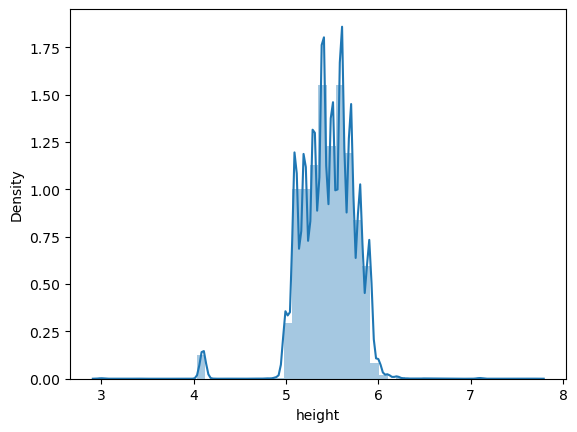

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)


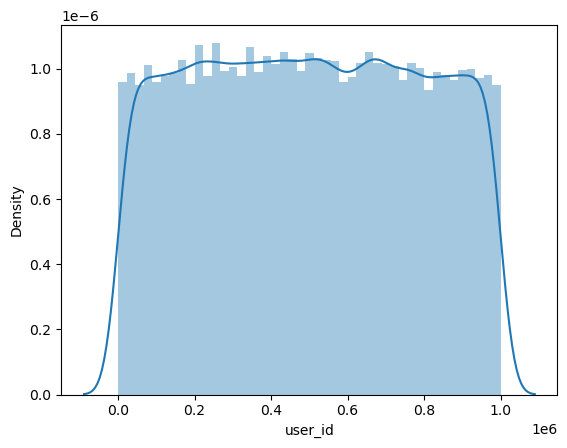

AxesSubplot(0.125,0.11;0.775x0.77)


/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


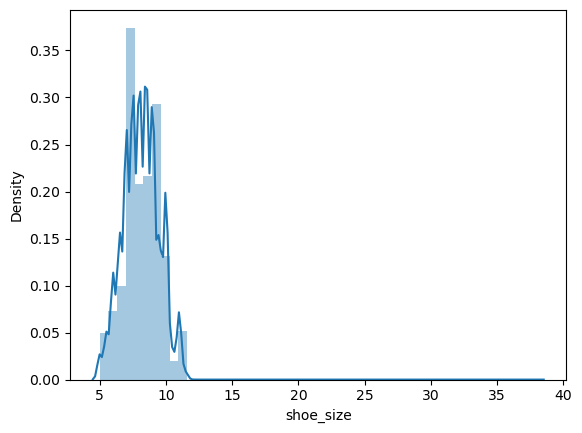

In [68]:
for i in df_num.columns:
    print(sns.distplot(df_num[i]))
    plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


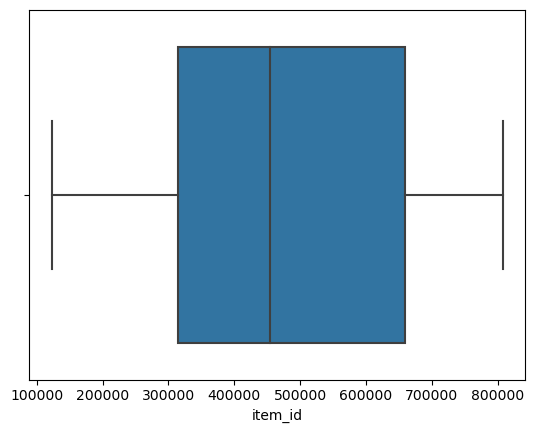

AxesSubplot(0.125,0.11;0.775x0.77)


/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


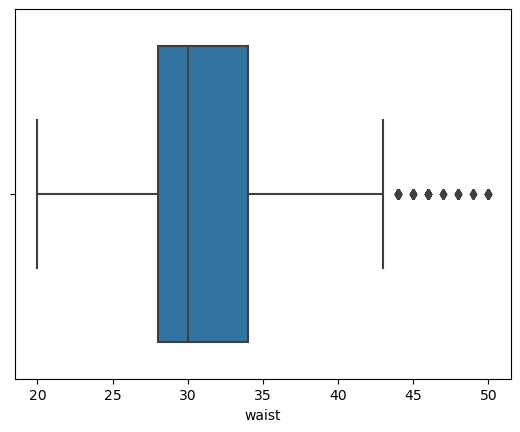

AxesSubplot(0.125,0.11;0.775x0.77)


/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


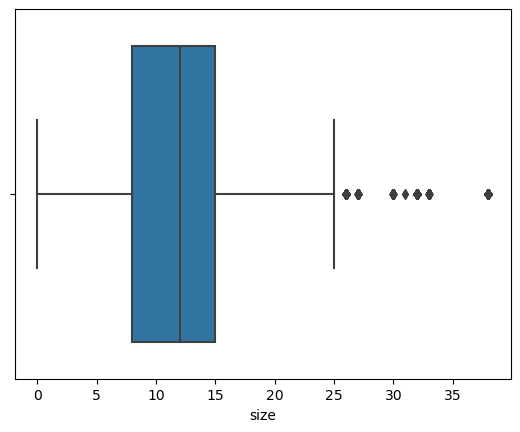

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


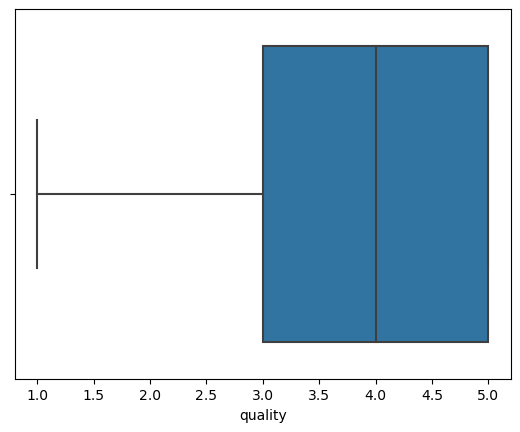

AxesSubplot(0.125,0.11;0.775x0.77)


/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


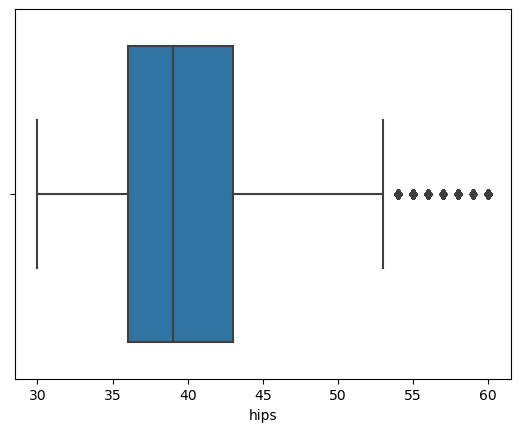

AxesSubplot(0.125,0.11;0.775x0.77)


/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


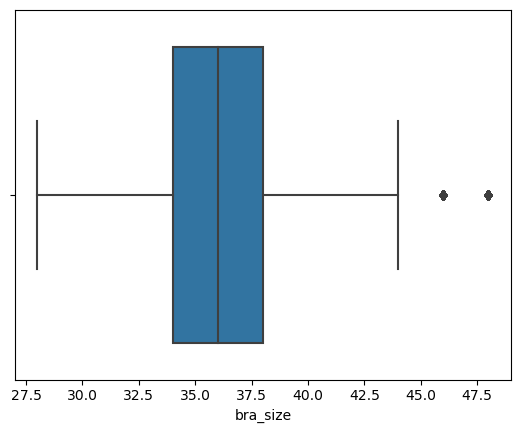

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


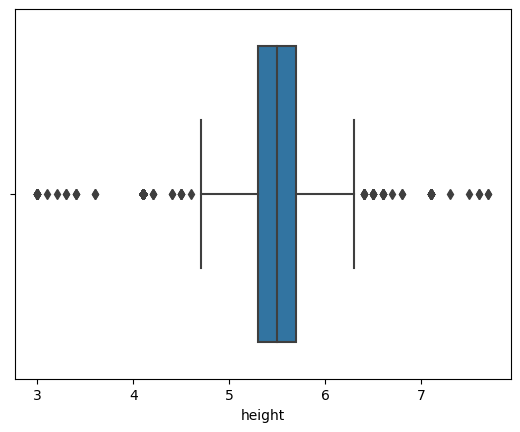

AxesSubplot(0.125,0.11;0.775x0.77)


/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


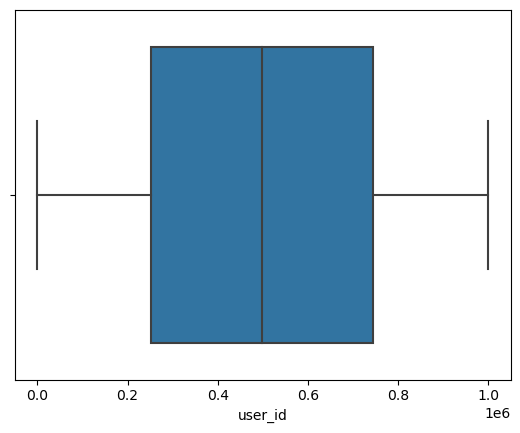

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.11;0.775x0.77)


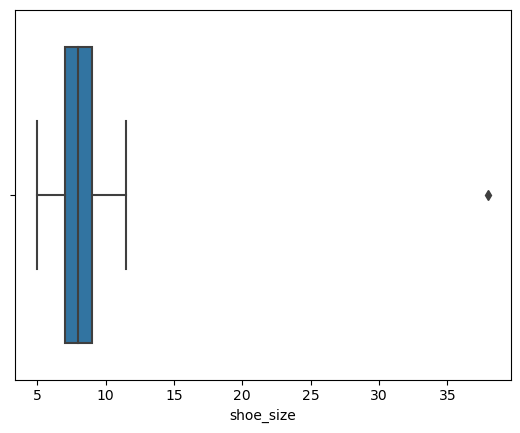

In [69]:
for i in df_num.columns:
    print(sns.boxplot(df_num[i]))
    plt.show()

### 4.4 Check the Skewness and Kurtosis.Explain what the Skewness and Kurtosis describe.


In [70]:
print('skewness of columns is\n\n')
for i in df_num.columns:
    print(i,'-',df_num[i].skew())
print('\n kurtosis of columns is\n\n')
for i in df_num.columns:
    print(i,'-',df_num[i].kurt())

skewness of columns is


item_id - -0.12064431567817357
waist - 0.9930606262915979
size - 1.1283012975160551
quality - -0.6767774975693622
hips - 0.9691874732078445
bra_size - 0.9010040022340067
height - -1.1087073854509366
user_id - 0.008200610412188364
shoe_size - 0.43671348402307403

 kurtosis of columns is


item_id - -1.215908810509701
waist - 0.836624233761492
size - 0.7600101174224343
quality - -0.16708476405420614
hips - 0.848463938836018
bra_size - 1.039444812091447
height - 5.356233546028161
user_id - -1.1824357768843805
shoe_size - 8.448819740218822


SKEWNESS:
    Skewness measures the symmetry or asymmetry of a dataset's distribution
    1. skew = 0 is normally distributed
    2. skew>0 is right tail
    3. skew<0 is left tail
    
KURTOSIS:
    Kurtosis is measure of peakedness of the dataset's distriution
    1. kurt = 3 is meso kurtic or normal
    2. kurt>3 is lepto kurtic
    3. kurt<3 is platy kurtic


### 4.5 Based on the above approach impute the missing values with the right metric. Or If you want to get some analysis before imputing missing values feel free to explore the analysis.

In [72]:
df_num.isnull().sum()/len(df_num)

item_id      0.000000
waist        0.965189
size         0.000000
quality      0.000821
hips         0.322817
bra_size     0.072690
height       0.013371
user_id      0.000000
shoe_size    0.662822
dtype: float64

In [73]:
df_cat.isnull().sum()/len(df_cat)

cup_size          0.075553
category          0.000000
bust              0.856818
user_name         0.000000
length            0.000423
fit               0.000000
shoe_width        0.775251
review_summary    0.081230
review_text       0.081230
dtype: float64

In [75]:
df_cat.drop(columns=['user_name'],axis=1,inplace=True)
df_cat.head()

,cup_size,category,bust,length,fit,shoe_width,review_summary,review_text
0,d,new,36,just right,small,NaN,NaN,NaN
1,b,new,NaN,just right,small,NaN,NaN,NaN
2,b,new,NaN,slightly long,small,NaN,NaN,NaN
3,dd/e,new,NaN,just right,fit,NaN,NaN,NaN
4,b,new,NaN,slightly long,small,NaN,NaN,NaN


In [76]:
df_num.drop(columns=['item_id','user_id'],axis=1,inplace=True)
df_num.head()

,waist,size,quality,hips,bra_size,height,shoe_size
0,29.0,7,5.0,38.0,34.0,5.6,NaN
1,31.0,13,3.0,30.0,36.0,5.2,NaN
2,30.0,7,2.0,NaN,32.0,5.7,9.0
3,NaN,21,5.0,NaN,NaN,NaN,NaN
4,NaN,18,5.0,NaN,36.0,5.2,NaN


In [77]:
for i in df_num.columns:
    df_num[i].fillna(df_num[i].median(),inplace=True)

In [78]:
for i in df_cat.columns:
    df_cat[i].fillna(df_cat[i].mode()[0],inplace=True)

In [79]:
df_num.isnull().sum()/len(df_num)

waist        0.0
size         0.0
quality      0.0
hips         0.0
bra_size     0.0
height       0.0
shoe_size    0.0
dtype: float64

In [80]:
df_cat.isnull().sum()/len(df_cat)

cup_size          0.0
category          0.0
bust              0.0
length            0.0
fit               0.0
shoe_width        0.0
review_summary    0.0
review_text       0.0
dtype: float64

1. We have removed the item_id,user_id and user_name features as these were used only for identification of consumer and the data doesn't help in making any inferences related to business insights.
2. we have imputed rest all other features as they help for business insights

### 5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3

In [81]:
for i in df_num.columns:
    Q1 = df_num[i].quantile(0.25)
    Q2 = df_num[i].quantile(0.5)
    Q3 = df_num[i].quantile(0.25)
    IQR=Q3-Q1
    ll = Q1-2.5*IQR
    ul = Q3+2.5*IQR

    outliers = df_num[(df_num[i]<ll)|(df_num[i]>ul)]

    if len(outliers) > 0:
        print(i,"Outliers present is",len(outliers))
    else:
        print(i,"No outliers found is",len(outliers))

waist Outliers present is 2645
size Outliers present is 64897
quality Outliers present is 63264
hips Outliers present is 77829
bra_size Outliers present is 60378
height Outliers present is 74110
shoe_size Outliers present is 24083


### 6. Check for the category dress review and visualize the top 10 reviews using any relevant plot. Identify the negative reviews if there are any

In [82]:
dress = df[df['category'] == 'dresses']

In [83]:
top_10_reviews = dress['review_text'].sort_values(ascending=False).head(10)

In [84]:
# please add the plot for the reviews.

In [85]:
# checking if there are negative comments

In [86]:
top_10_reviews[top_10_reviews.str.contains("bad","poor")]  

Series([], Name: review_text, dtype: object)

In [87]:
# Inference
# We got a few negative comments in the review text.

### 7. Find out the average shoe size for the different fits of the customer. Visualize using any relevant plot. Explain that, Is there any significant different shoe sizes for different fits?

In [88]:
round(df.groupby('fit')['shoe_size'].mean())

fit
fit      8.0
large    8.0
small    8.0
Name: shoe_size, dtype: float64

<AxesSubplot:xlabel='fit'>

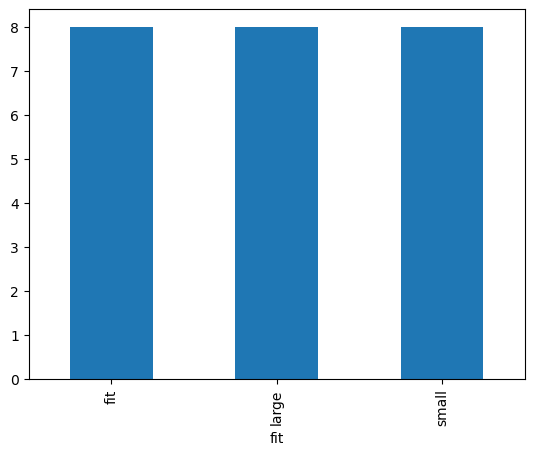

In [89]:
round(df.groupby('fit')['shoe_size'].mean()).plot(kind='bar')

Inference:

1. the customers are more comfortable with shoe size of 8
2. some feel its large form and small for them with size shoe of 8

### 8. Identify the customer’s common shoe width and average size for those who purchased the maximum quality. Is the mode of shoe width affect the user review? Visualize using the appropriate plot.

In [90]:
df2 = df[df['quality']==5]

<AxesSubplot:xlabel='shoe_width'>

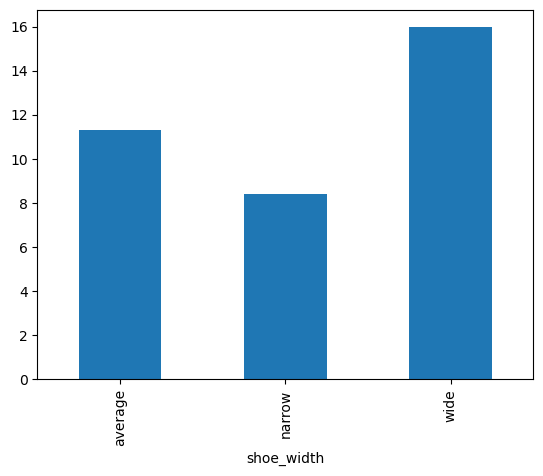

In [91]:
df2.groupby('shoe_width')['size'].mean().plot(kind='bar')

Inference:
1. From graph we infere that the shoe width and size are related
2. The shoe width is wide the size are more available for the customers to purchase
3. The shoe width is narrow the size are less available compared with average and wide shoe width 
   for the customers to purchase


### 9. Extract the records belonging to the top 10 reviews, and then find the review summary for the different cup sizes. The basic analysis explains what you would try to infer. Try to use visualization.

In [92]:
# getting the top ten reviews by sorting from high to low.
top_ten = df[df['quality'] == 5.0].sort_values(by='quality',ascending=False).head(10)
top_ten

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
55950,637907,NaN,20,5.0,c,38.0,38.0,tops,NaN,5.4,bthom77,just right,small,51450,7.0,NaN,I originally ordered the,"I originally ordered the 1x, but the fit was a..."
55945,637907,NaN,12,5.0,d,36.0,36.0,tops,NaN,5.9,daisy00mae,just right,fit,997730,9.5,NaN,Love this! Goes over any,Love this! Goes over any dress to class it up ...
55940,637907,NaN,8,5.0,c,35.0,34.0,tops,NaN,4.1,sl_jenkins,slightly short,small,851445,NaN,NaN,Beautiful but not practic,Beautiful but not practical.
55938,637907,NaN,4,5.0,d,NaN,32.0,tops,NaN,5.7,mary3dm,just right,fit,919516,NaN,NaN,I love this wrap. It is s,I love this wrap. It is so cute and perfect to...
55934,637340,NaN,4,5.0,a,35.0,34.0,tops,33,4.1,Joanna,just right,fit,424765,6.0,average,Great fit,Great fit
55933,637340,NaN,12,5.0,c,41.0,36.0,tops,NaN,5.9,Alice,just right,fit,129156,10.0,average,"Perfect, basicbutinterest","Perfect, basicbutinteresting, inexpensive litt..."
55932,637340,NaN,8,5.0,ddd/f,40.0,34.0,tops,NaN,5.3,krichend,just right,fit,310119,NaN,NaN,Shirt fits beautifully. S,Shirt fits beautifully. Slut may be a little t...
55930,637340,NaN,8,5.0,dd/e,36.0,34.0,tops,NaN,5.5,nadinelowes,just right,fit,133046,8.0,average,Great fit soft and comfor,Great fit soft and comfortable
55925,637340,32.0,12,5.0,dd/e,43.0,36.0,tops,NaN,5.5,Sandra,just right,large,115238,NaN,NaN,Very comfortable! A tad b,Very comfortable! A tad big but nothing super ...


In [93]:
# imputing the missing values with mode od the 'review_summary'
filled_top_ten = top_ten['review_summary'].fillna(top_ten['review_summary'].mode(), inplace=True)

In [98]:
top_ten

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,NaN,Beautiful but not practic,NaN
55950,637907,NaN,20,5.0,c,38.0,38.0,tops,NaN,5.4,bthom77,just right,small,51450,7.0,NaN,I originally ordered the,"I originally ordered the 1x, but the fit was a..."
55945,637907,NaN,12,5.0,d,36.0,36.0,tops,NaN,5.9,daisy00mae,just right,fit,997730,9.5,NaN,Love this! Goes over any,Love this! Goes over any dress to class it up ...
55940,637907,NaN,8,5.0,c,35.0,34.0,tops,NaN,4.1,sl_jenkins,slightly short,small,851445,NaN,NaN,Beautiful but not practic,Beautiful but not practical.
55938,637907,NaN,4,5.0,d,NaN,32.0,tops,NaN,5.7,mary3dm,just right,fit,919516,NaN,NaN,I love this wrap. It is s,I love this wrap. It is so cute and perfect to...
55934,637340,NaN,4,5.0,a,35.0,34.0,tops,33,4.1,Joanna,just right,fit,424765,6.0,average,Great fit,Great fit
55933,637340,NaN,12,5.0,c,41.0,36.0,tops,NaN,5.9,Alice,just right,fit,129156,10.0,average,"Perfect, basicbutinterest","Perfect, basicbutinteresting, inexpensive litt..."
55932,637340,NaN,8,5.0,ddd/f,40.0,34.0,tops,NaN,5.3,krichend,just right,fit,310119,NaN,NaN,Shirt fits beautifully. S,Shirt fits beautifully. Slut may be a little t...
55930,637340,NaN,8,5.0,dd/e,36.0,34.0,tops,NaN,5.5,nadinelowes,just right,fit,133046,8.0,average,Great fit soft and comfor,Great fit soft and comfortable
55925,637340,32.0,12,5.0,dd/e,43.0,36.0,tops,NaN,5.5,Sandra,just right,large,115238,NaN,NaN,Very comfortable! A tad b,Very comfortable! A tad big but nothing super ...


<AxesSubplot:xlabel='cup_size'>

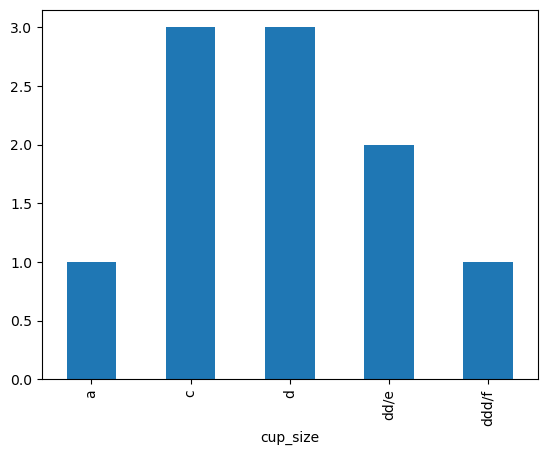

In [99]:
# review summary for different cup sizes..
pd.crosstab(top_ten['review_summary'], top_ten['cup_size']).sum().plot(kind='bar')

plot for the review summary for different cup sizes...

1. Inference cup size c and d has almost same number of reviews, where as cup size a and ddd/f have almost same number of reviews. where as dd/e cup size has little extra number of reviews than the dd/e.

2. We can say that most of the customers uses the c and d cup size.

### 10. Identify the most common review that we got from the customer whose hips size is greater than 35. Find out what kind of inference you can make.

In [102]:
df1 = df[df['hips']>35]

In [103]:
df1.groupby('review_summary').size()

review_summary
!                                                                2
#4 for me! I'm collecting                                        1
#FashionDeux  This is the                                        1
#FashionDeux I have been                                         1
#FashionDeux This skirt i                                        1
#Review ContestAlthough t                                        1
#ReviewContest    I don't                                        1
#ReviewContest    I wish                                         1
#ReviewContest    Love th                                        4
#ReviewContest    Super c                                        1
#ReviewContest   Can't st                                        1
#ReviewContest   I love t                                        1
#ReviewContest   I wasn't                                        1
#ReviewContest   Obsessed                                        1
#ReviewContest  I love th                      

Inference :

1. from the reviews we infere the most common review are the customers are super excited about their dresses and fabric is comfortable and they really liked their outifits 

### 11. What is the relationship between height and weight? Describe what kind of relationship it has.

In [104]:
df[['height','waist']].corr()

,height,waist
height,1.000000,0.126533
waist,0.126533,1.000000


<AxesSubplot:>

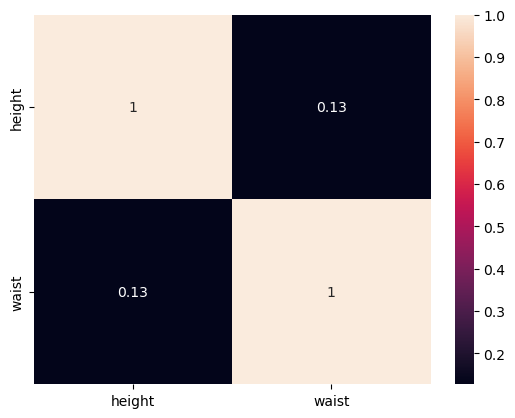

In [105]:
sns.heatmap(df[['height','waist']].corr(),annot =True)

Inference:
1. the relation between the height and waist is weak postive correlated with value of 0.13

### 12. Plot the pair plot for the numerical plot. Explain according to your problem statement how the pair plot would help you.

In [106]:
df_num.columns

Index(['waist', 'size', 'quality', 'hips', 'bra_size', 'height', 'shoe_size'], dtype='object')

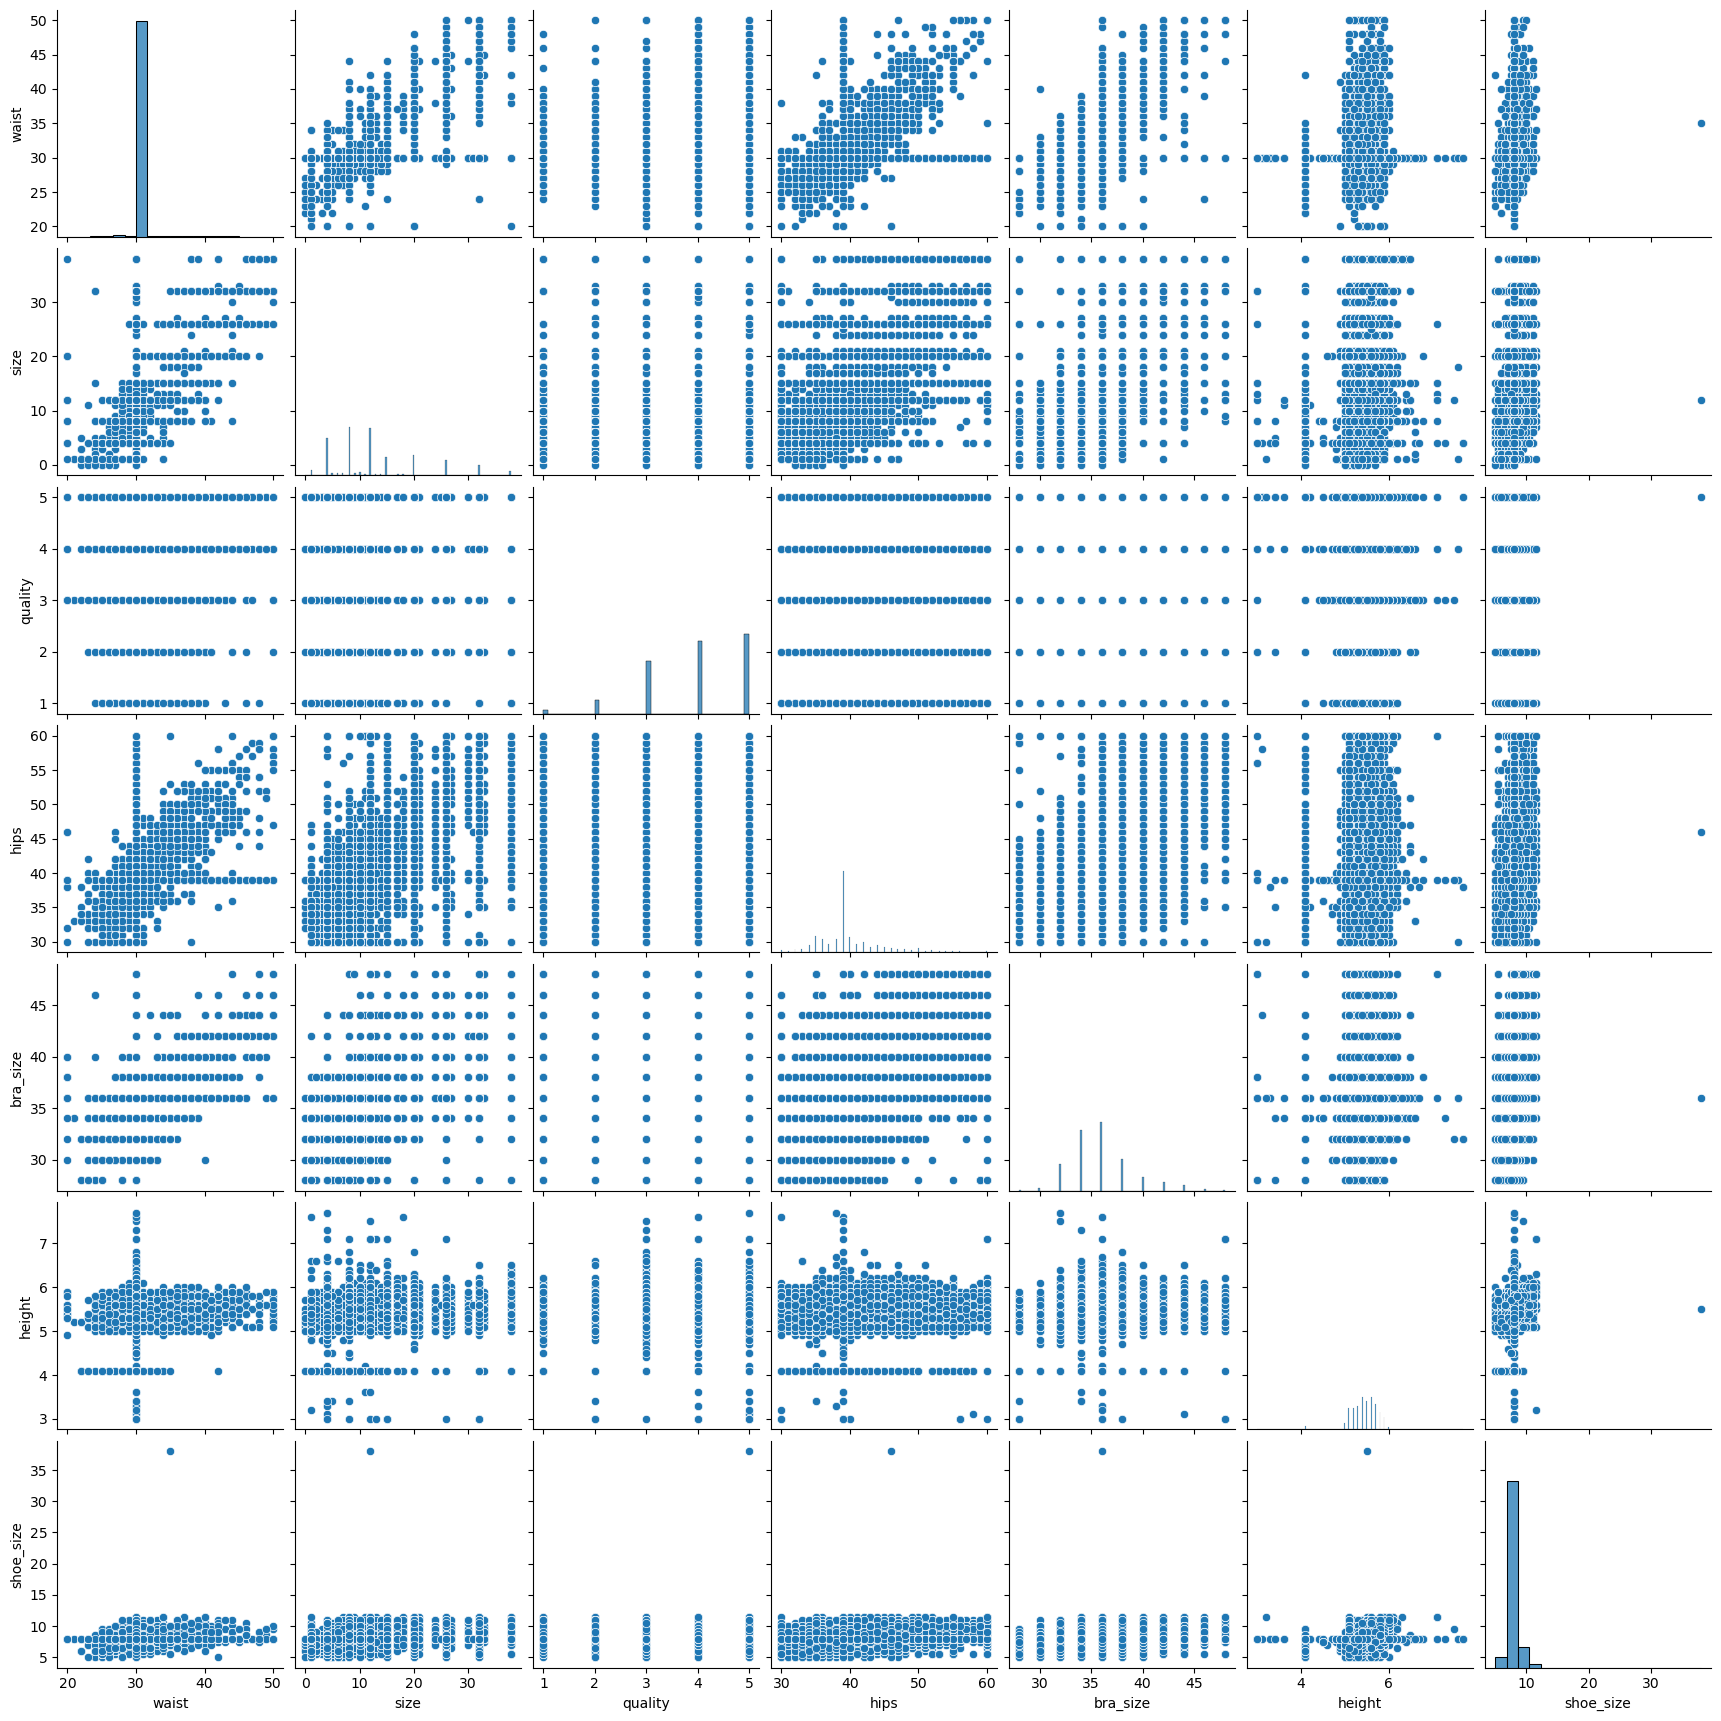

In [107]:
sns.pairplot(df_num)

Inference:
1. the pair plot help to find the relationship between the variable of the dataset
2. the diagonal is always hist because it plot between same variable
3. the upper triangle is same as lower triangle

## Statistical Analysis:


### 1. Test the claim that the category feature and review summary have any relationship among them. The level of significance is 5%.

In [108]:
df['category'].unique()

array(['new', 'dresses', 'wedding', 'sale', 'tops', 'bottoms',
       'outerwear'], dtype=object)

In [109]:
ct = pd.crosstab(df['category'], df['review_summary']).sum()

In [110]:
test_stat,p_val,dof,ex =stats.chi2_contingency(ct)

In [111]:
p_val > 0.05

True

Inference: As p value is greater than the significance level we failed to reject the null hypothesis.

### 2. Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test

In [121]:
# H0: size and hips are normal
# H1: size and hips are  not normal

In [118]:
# checking the normality of the variables size and hips
stats.shapiro(df_num['size'])

ShapiroResult(statistic=0.8812057971954346, pvalue=0.0)

In [119]:
print("Since p value is less than the significance level we reject h0, concluding that the data is not normal..")

Since p value is less than the significance level we reject h0, concluding that the data is not normal..


In [120]:
stats.shapiro(df_num['hips'])

ShapiroResult(statistic=0.8664804100990295, pvalue=0.0)

In [122]:
stats.levene(df['hips'],df['size'])

LeveneResult(statistic=nan, pvalue=nan)

In [123]:
print("As the data is not normal after the test, we assume the data is normal and have the equal variance and proceed further with the Parametric test.")

As the data is not normal after the test, we assume the data is normal and have the equal variance and proceed further with the Parametric test.


In [124]:
df['hips'].isnull().sum()

26726

In [125]:
df['hips'].fillna(df['hips'].median(), inplace=True)

In [126]:
df['hips'].median()

39.0

In [127]:
df['size'].isnull().sum()

0

In [128]:
stats.pearsonr(df['hips'], df['size'])

PearsonRResult(statistic=0.5888978928845103, pvalue=0.0)

In [129]:
print("Since the p value is less than the significance value we reject the null hypothesis, concluding that the hips and size features are dependent on each other.")

Since the p value is less than the significance value we reject the null hypothesis, concluding that the hips and size features are dependent on each other.


### 3. Does the quality significantly differ for any one shoe width? Test the test with 96% confidence intervals.Check the normality of the data before the above test. Alpha = .05

In [204]:
# hypothesis formation
# h0: quality and shoe width are independent
# h1: quality and shoe width are dependent

In [205]:
df['shoe_width'].unique()

array([nan, 'wide', 'average', 'narrow'], dtype=object)

In [206]:
df['shoe_width'].mode()

0    average
Name: shoe_width, dtype: object

In [207]:
df['shoe_width'].isnull().sum()

64183

In [208]:
avg_qual = df[df['shoe_width'] == 'average']['quality']
wide_qual = df[df['shoe_width'] == 'wide']['quality']
narrw_qual = df[df['shoe_width'] == 'narrow']['quality']

In [209]:
stats.f_oneway(avg_qual, wide_qual, narrw_qual)

F_onewayResult(statistic=nan, pvalue=nan)

In [210]:
print("Since the p value is not a number, we reject the null hypothesis, concluding that the Quality and Shoe width are dependent on each other.")

Since the p value is not a number, we reject the null hypothesis, concluding that the Quality and Shoe width are dependent on each other.


### 4. Check if the shoe width feature affects the review summary with a 99% confidence interval.

In [152]:
# h0: shoe width and review summary are independent
# h1: shoe width and review summary are dependent

In [155]:
ct = pd.crosstab(df_cat['shoe_width'],df_cat['review_summary'])

In [156]:
test_stat, p_val, dof, exp = stats.chi2_contingency(ct)

In [157]:
p_val > 0.01

False

Since p value is less than significance level, we reject the null hypothesis, concluding that the shoe width and review summary are dependent

### 5. Check if the length feature affects the review summary with a 95% confidence interval.

In [180]:
df_cat['length'].unique()

array(['just right', 'slightly long', 'very short', 'slightly short',
       'very long'], dtype=object)

In [181]:
ct = pd.crosstab(df_cat['length'], df_cat['review_summary'])

In [182]:
test_stat, p_val, dof, exp = stats.chi2_contingency(ct)

In [183]:
p_val > 0.05

False

Since the p value is less than the significance level, we reject the null hypothesis, concluding that the lenght affects the review summary.

### 6. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha.
### Check the normality of the data before the above test. Alpha = .05

In [211]:
# Checking the normality of the data before
# quality, 
# fit

stats.shapiro(df['quality'])

/Users/tejanaresh/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [212]:
print("Since pvalue greater than the significance level, we conclude that the data is normal. Hence we shall undergo parametric test.")

Since pvalue greater than the significance level, we conclude that the data is normal. Hence we shall undergo parametric test.


In [213]:
df['fit'].unique()

array(['small', 'fit', 'large'], dtype=object)

In [214]:
small_qual = df[df['fit'] == 'small']['quality']
fit_qual = df[df['fit'] == 'fit']['quality']
large_qual = df[df['fit'] == 'large']['quality']

In [215]:
stats.f_oneway(large_qual, small_qual,fit_qual)

F_onewayResult(statistic=nan, pvalue=nan)

In [216]:
print('As we are getting nan in the pvalue we reject the null hypothesis, concluding that the average quality does not significantly differ for the different fits')

As we are getting nan in the pvalue we reject the null hypothesis, concluding that the average quality does not significantly differ for the different fits


In [217]:
# Normality test after the test..
stats.shapiro(df['quality'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [218]:
# The normality is same even after the test.